# Background of dataset

Raw dataset has 891 rows × 10 columns and column age has 177 na and branch has 2 na.


# Flow of Exploration of Dataset


- Exploration Data Analysis - This section show the initial min, max about the columns


- Finding the dataset null value and null replacing strategy - Dropping 179 rows from 891 rows is not the best strategy since it will cause bias so have used replacing strategy for age column. This section gives information null values impacing the dataset and how the missing age column are tacked. 


- Visual Graph exploration - Graph are explored with differenet hypothesis on Customer segment, Geography, Age Distribution (all the graph are interactive and can be seem in the folder named Graph)


- Initial fees level - Categorize with Customer segment, Branch - This section gives the overlapping factors customer_segment, branch on initial fees level


- Convert Categorical variables into Numeric Categories - The categorical variables are converted to numberic class to keep easy for computation

# Findings from the Dataset

- Analysis on converted 340 rows and not converted - 550 rows
- Find the columns/features impacting the conversion - Correction Matrix
- A simple ML model for the cleaned dataset to find the factors impacting Converted





In [145]:
import pandas as pd
import math
import plotly.express as px
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import data_patterns
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [113]:
data = pd.read_csv('DS_customer_data_sample.csv')
data

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
...,...,...,...,...,...,...,...,...,...,...
886,15887,0,12,male,27.0,0,0,26.0000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0000,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,NaN,1,2,46.9000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0000,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere


# Exploration Data Analysis

In [114]:
print('Are the customers unique or there is repetition of customer id')
print(data['customer_id'].nunique())
print('------------')

print('Number of Customer Segments')
print(data['customer_segment'].unique())
print('------------')

print('Number of Gender')
print(data['gender'].unique())
print('------------')

print('Find the number of unique value in related customer')
print(data['related_customers'].unique())
print('------------')

print('Find the number unique Familie size')
print(data['related_customers'].unique())

print('------------')
print('Find the number unique Familie size')
print(data['branch'].unique())

print('------------')
print('Find age min and max')
print(data['age'].min())
print(data['age'].max())



Are the customers unique or there is repetition of customer id
891
------------
Number of Customer Segments
[13 11 12]
------------
Number of Gender
['male' 'female']
------------
Find the number of unique value in related customer
[1 0 3 4 2 5 8]
------------
Find the number unique Familie size
[1 0 3 4 2 5 8]
------------
Find the number unique Familie size
['Helsinki' 'Tampere' 'Turku' nan]
------------
Find age min and max
0.42
80.0


# Finding the dataset null value and null replacing strategy

In [115]:
#pick only the na rows in the dataset
data.isna().sum()

customer_id            0
converted              0
customer_segment       0
gender                 0
age                  177
related_customers      0
family_size            0
initial_fee_level      0
credit_account_id      0
branch                 2
dtype: int64

In [116]:
#mean value of the column branch with each category
data.groupby('customer_segment').mean()  

,customer_id,converted,age,related_customers,family_size,initial_fee_level
customer_segment,,,,,,
11,15461.597222,0.629630,38.233441,0.416667,0.356481,168.309375
12,15445.956522,0.472826,29.877630,0.402174,0.380435,41.324366
13,15439.154786,0.242363,25.140620,0.615071,0.393075,27.351100


In [117]:
'''
There 177 empty values in the dataset in the column age
Replace the empty value with the average value of the customer segment
'''
for idx,row in data.age.iteritems():
    if math.isnan(row):
        if (data.customer_segment[idx] == 11):
            data['age'][idx] = 38
        if (data.customer_segment[idx] == 12):
            data['age'][idx] = 30
        if (data.customer_segment[idx] == 13):
            data['age'][idx] = 25

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/2674624696.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/2674624696.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/2674624696.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [118]:
# Remove the 2 rows which the branch is empty
clean_data = data.dropna()
clean_data

,customer_id,converted,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,15001,0,13,male,22.0,1,0,14.5000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
1,15002,1,11,female,38.0,1,0,142.5666,afa2dc179e46e8456ffff9016f91396e9c6adf1fe20d17...,Tampere
2,15003,1,13,female,26.0,0,0,15.8500,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
3,15004,1,11,female,35.0,1,0,106.2000,abefcf257b5d2ff2816a68ec7c84ec8c11e0e0dc4f3425...,Helsinki
4,15005,0,13,male,35.0,0,0,16.1000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
...,...,...,...,...,...,...,...,...,...,...
886,15887,0,12,male,27.0,0,0,26.0000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
887,15888,1,11,female,19.0,0,0,60.0000,72294ba1616ddcaee48e56501040e876d26bd0c1839f3c...,Helsinki
888,15889,0,13,female,25.0,1,2,46.9000,9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6...,Helsinki
889,15890,1,11,male,26.0,0,0,60.0000,a2b612f45840d6f27b1a73ddae7f50e0bd9c4935903de6...,Tampere


# Visual Graph exploration

In [119]:
# Initial fees collected from Customer segment 

fig = px.pie(clean_data, values='initial_fee_level', 
             names='customer_segment',
             title = "Each customer segment impact on Initial fees")
fig.show()

clean_data.groupby('customer_segment').mean()
#fig.write_html("graph/Each customer segment impact on Initial fees.html")

'''
Result - From the  graph 11 brings in more money

'''

'\nResult - From the  graph 11 brings in more money\n\n'

In [120]:
#Segment the data with Geography
fig = px.pie(clean_data, values='initial_fee_level', names='branch', 
             title='Customer Segment by Geography')    
fig.show()
fig.write_html("graph/Customer Segment by Geography.html")
'''
Result - Helsinki is the dominant Market in this dataset on splitting the customer segment
''' 

'\nResult - Helsinki is the dominant Market in this dataset on splitting the customer segment\n'

In [121]:
#Age distribution
fig = px.histogram(clean_data, x='age',title="Age distribution")
fig.show()
fig.write_html("graph/Age distribution.html")
'''
From the graph - there are lots of customer within the age 20-30, but there are ages 0.4,0.5 in the dataset that is puzzling
'''



'\nFrom the graph - there are lots of customer within the age 20-30, but there are ages 0.4,0.5 in the dataset that is puzzling\n'

# Initial fees level - Categorize with Customer segment, Branch 

In [122]:
# Remove Customer id from dataset 
del clean_data['customer_id']

In [123]:
#Which branch has the most of the customer segment from 

fig = px.histogram(clean_data, x='customer_segment', y='initial_fee_level', color='branch', title = "Initial Fees collected  impact from customer segment from each branch")
fig.update_layout(bargap=.7)
fig.show()

fig.write_html("graph/Initial Fees collected  impact from customer segment from each branch.html")
'''
Result - Helsinki is the biggest market followed by Tampere and then Turku
'''

'\nResult - Helsinki is the biggest market followed by Tampere and then Turku\n'

# Convert Categorical variables into Numeric Categories

In [124]:
#Replace the gender text to numeric

'''male by 0 and female by 1 '''

for idx,row in clean_data['gender'].iteritems():
    if row == 'male':
        clean_data['gender'][idx] = 0
    else:
        clean_data['gender'][idx] = 1

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/3261883584.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/3261883584.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
#Replace the credit_account_id from n

''' 
9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0" as 0 and other value as 1
'''

for idx,row in clean_data['credit_account_id'].iteritems():
    if clean_data['credit_account_id'][idx] == '9b2d5b4678781e53038e91ea5324530a03f27dc1d0e5f6c9bc9d493a23be9de0':
        clean_data['credit_account_id'][idx] =0
        
    else:
        clean_data['credit_account_id'][idx] =1  

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/199418252.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/199418252.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [126]:
#Replace branch name from text to numbers
'''
Helsinki - 0
Tampere - 1
Turku - 2
'''

for idx,row in clean_data['branch'].iteritems():
    if clean_data['branch'][idx] == 'Helsinki':
        clean_data['branch'][idx] =0
    elif clean_data['branch'][idx] == 'Tampere':
        clean_data['branch'][idx] =1
    elif clean_data['branch'][idx] == 'Turku':
        clean_data['branch'][idx] =2

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/659498159.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/659498159.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/20/9_zpc0mx6cz0z00dd5ttdhr00000gn/T/ipykernel_2132/659498159.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Total Number of people converted 340 (with cleaning dataset)

In [127]:
clean_data['converted'].sum()
#from the query - out of 890 unique id - only 340 are converted

340

In [128]:
# picking out the helsinki rows - Out 889 rows - 644,168,77 rows are from Helsinki, tampere,turku market
helsinki = clean_data[clean_data['branch'] == 0]
print('Number of Helsinki rows',helsinki.shape)


tampere = clean_data[clean_data['branch'] == 1]
print('Number of tampere rows',tampere.shape)

turku = clean_data[clean_data['branch'] == 2]
print('Number of turku rows',turku.shape)



Number of Helsinki rows (644, 9)
Number of tampere rows (168, 9)
Number of turku rows (77, 9)


In [129]:
#out of 217 converted from Helsinki 
print('Helsinki converted ',helsinki['converted'].sum())

#out of  93 are converted from tampere
print('Tampere converted ',tampere['converted'].sum())

#out of 30 are converted from Turku
print('Turku converted ',turku['converted'].sum())

Helsinki converted  217
Tampere converted  93
Turku converted  30


# Total Number of people not converted - 549 (with cleaned dataset)

In [130]:
# out of 427 non converted from Helsinki 
print('Helsinki non converted',644 - helsinki['converted'].sum())

# out of 75 non converted from tampere 
print('Tampere non converted',168 - tampere['converted'].sum())

# out of 47 non converted from tampere
print('Turku non converted',77 - turku['converted'].sum())

Helsinki non converted 427
Tampere non converted 75
Turku non converted 47


# Find the columns/features impacting the conversion - Correction Matrix

In [131]:
clean_data.corr()

,converted,customer_segment,age,related_customers,family_size,initial_fee_level
converted,1.000000,-0.335549,-0.054934,-0.034040,0.083151,0.255290
customer_segment,-0.335549,1.000000,-0.401322,0.081656,0.016824,-0.548193
age,-0.054934,-0.401322,1.000000,-0.242834,-0.174280,0.118205
related_customers,-0.034040,0.081656,-0.242834,1.000000,0.414542,0.160887
family_size,0.083151,0.016824,-0.174280,0.414542,1.000000,0.217532
initial_fee_level,0.255290,-0.548193,0.118205,0.160887,0.217532,1.000000




## The below findings are by keeping the correlation threshold above 0.15
1. Converted column  - Impacted by customer_segment initial_fees_level 
2. customer_segment column -  Impacted by age that decides initial_fees_level
3. Age column - Impacted by customer_segment, related_customers, family size 





# A simple ML model for the cleaned dataset

Since the converted predictor variable is given - i am approaching this with Supervised Learning models

In [132]:
#extract predictor variable converted
predictor_variable = clean_data['converted']
predictor_variable

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: converted, Length: 889, dtype: int64

In [133]:
#Features without predictor variable
del clean_data['converted']

features = clean_data
features

,customer_segment,gender,age,related_customers,family_size,initial_fee_level,credit_account_id,branch
0,13,0,22.0,1,0,14.5000,0,0
1,11,1,38.0,1,0,142.5666,1,1
2,13,1,26.0,0,0,15.8500,0,0
3,11,1,35.0,1,0,106.2000,1,0
4,13,0,35.0,0,0,16.1000,0,0
...,...,...,...,...,...,...,...,...
886,12,0,27.0,0,0,26.0000,0,0
887,11,1,19.0,0,0,60.0000,1,0
888,13,1,25.0,1,2,46.9000,0,0
889,11,0,26.0,0,0,60.0000,1,1


In [135]:
del clean_data['branch']

del clean_data['customer_segment']

In [136]:

X_train, X_test, y_train, y_test = train_test_split(
    features, predictor_variable, test_size=0.33, random_state=42)

In [151]:
def ensambled(d1,d2,d3,d4):
    model = 'Decision Tree'
    clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2,
        random_state=0)
    clf.fit(d1,d2)

    scores = clf.score(d3, d4)
    print('Accuracy for Decision Tree',scores.mean())

    y_pred = clf.predict(d3)
    mae = metrics.mean_absolute_error(d4, y_pred)
    mse = metrics.mean_squared_error(d4, y_pred)
    r2 = metrics.r2_score(d4, y_pred)
    print(model,mae,mse,r2,clf)

    model = 'Random Forest'
    clf = RandomForestClassifier(n_estimators=10, max_depth=None,
        min_samples_split=2, random_state=0)
    clf.fit(d1,d2)

    scores = clf.score(d3, d4)
    print('Accuracy for Random Forest',scores.mean())

    y_pred = clf.predict(d3)
    mae = metrics.mean_absolute_error(d4, y_pred)
    mse = metrics.mean_squared_error(d4, y_pred)
    r2 = metrics.r2_score(d4, y_pred)
    print(model,mae,mse,r2,clf)

In [142]:
def visualize(d1,d2,d3):
    model = ExtraTreesClassifier()
    model.fit(d1,d2)
    #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
    #plot graph of feature importances for better visualization
    feat_importances = pd.Series(model.feature_importances_, index=d1.columns)
    feat_importances.nlargest(10).plot(kind='barh')
    feat_importances = feat_importances.nlargest(10)
    #print(d1[feat_importances.keys()])
    #print(d3[feat_importances.keys()])
    
    plt.show()
    return d1[feat_importances.keys()], d3[feat_importances.keys()]



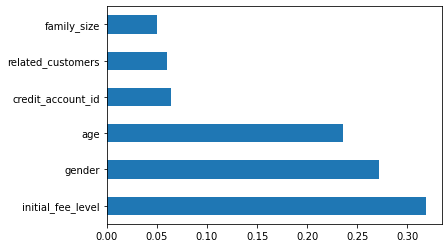

Accuracy for Decision Tree 0.782312925170068
Decision Tree 0.21768707482993196 0.21768707482993196 0.07035573122529659 DecisionTreeClassifier(random_state=0)
Accuracy for Random Forest 0.8095238095238095
Random Forest 0.19047619047619047 0.19047619047619047 0.18656126482213442 RandomForestClassifier(n_estimators=10, random_state=0)


In [152]:
def main():

    rdata_train,rdata_test = visualize(X_train,y_train, X_test)
   
    emsabled = ensambled(rdata_train,y_train,rdata_test,y_test)
    #cnn_result = cnn.cnn_model(x_train,y_train,x_test,y_test)
    
if __name__ == "__main__":
    main()

